# Learner/Facilitator Guide for Full Quantum Computing for Developers

## Topic 1: Introduction to Quantum Computing

### Install Qiskit

In [ ]:
!pip install qiskit[all]
!pip install pylatexenc
!pip install pyscf
!pip install cirq
!pip install qutip

     |████████████████████████████████| 6.5 MB 4.7 MB/s 
     |████████████████████████████████| 18.0 MB 86 kB/s 
     |████████████████████████████████| 238 kB 53.7 MB/s 
     |████████████████████████████████| 200 kB 52.1 MB/s 
     |████████████████████████████████| 154 kB 47.0 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 118 kB 51.5 MB/s 
     |████████████████████████████████| 4.4 MB 36.8 MB/s 
     |████████████████████████████████| 294 kB 47.6 MB/s 
     |████████████████████████████████| 162 kB 27.7 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 1.6 MB 37.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 6.5 MB/s 
     |████████████████████████████████| 943 kB 39.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |██████████████████

     |████████████████████████████████| 37.5 MB 1.5 MB/s 


In [ ]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, assemble, Aer, BasicAer, transpile, execute
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import Statevector
from fractions import Fraction


from math import sqrt, pi
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': None, 'qiskit-nature': '0.3.1', 'qiskit-finance': '0.3.1', 'qiskit-optimization': '0.3.2', 'qiskit-machine-learning': '0.3.1'}

###Connect to IBMQ API

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('d330b44b077d9ae56714c4ba96676236d87a63bf10cddb7e736e81658af8fab730e5a3aa92778da79f1fb93d29492a6f7f7fd9e074edb520e8b79b64dad61c0e')
IBMQ.load_account()

configrc.store_credentials:WARNING:2022-03-30 15:51:10,373: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-03-30 15:51:10,724: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Topic 2 Single Qubit Quantum States and Gates


### Representing Qubit States and Statevector

In [ ]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

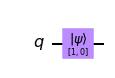

In [ ]:
initial_state = [1,0]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

In [ ]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [ ]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
# print(out_state) # Display the output state vector
array_to_latex(out_state)

<IPython.core.display.Latex object>

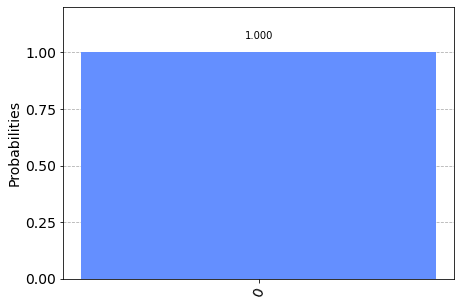

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

### Activity: Statevector

In [ ]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [ ]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
array_to_latex(state)          # Print the result

<IPython.core.display.Latex object>

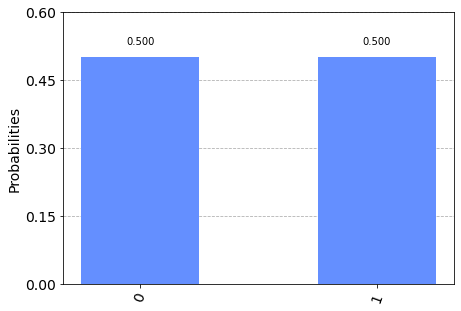

In [ ]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

### Measurement

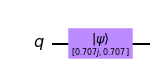

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [ ]:
state = execute(qc, backend).result().get_statevector()
array_to_latex(state)

<IPython.core.display.Latex object>

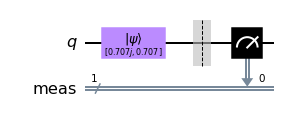

In [ ]:
qc.measure_all()
qc.draw('mpl')

In [ ]:
state = execute(qc, backend).result().get_statevector()
array_to_latex(state)

<IPython.core.display.Latex object>

### Bloch Sphere

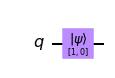

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [1,0]
qc.initialize(initial_state, 0)
qc.draw('mpl')

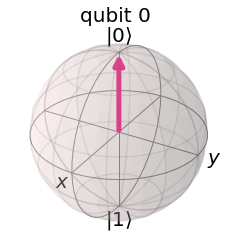

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### Activity: Bloch Sphare


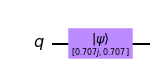

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

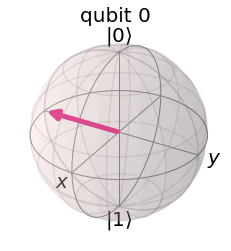

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

### Pauli X Gate

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)

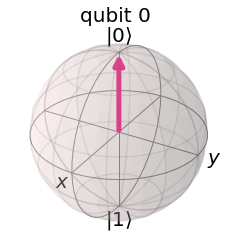

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

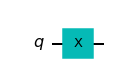

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

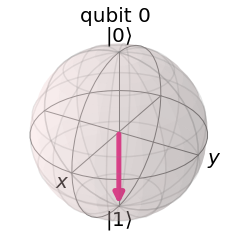

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

### Pauli Y Gate

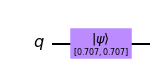

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.draw('mpl')

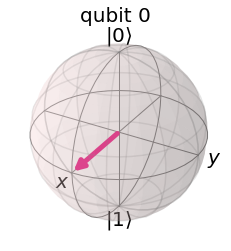

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

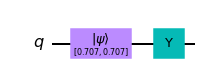

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.y(0)
qc.draw('mpl')

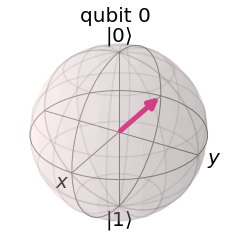

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

### Pauli Z Gate

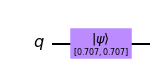

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.draw('mpl')

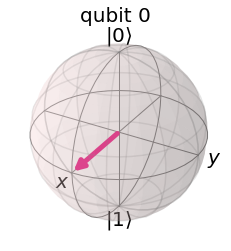

In [ ]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

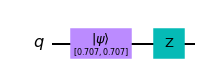

In [ ]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [1/sqrt(2),1/sqrt(2)]
qc.initialize(initial_state, 0)
qc.z(0)
qc.draw('mpl')

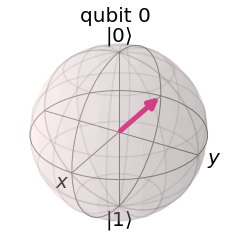

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)

<IPython.core.display.Latex object>

### Hadamard Gate

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)

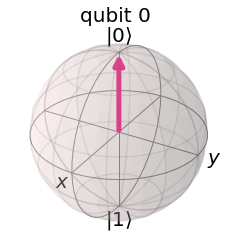

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

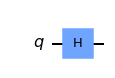

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

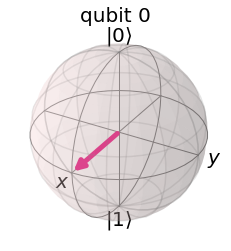

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)  

<IPython.core.display.Latex object>

### Activity: X Measurement

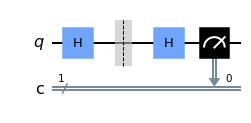

In [ ]:
qc = QuantumCircuit(1,1)
# Create a |+>
qc.h(0)
qc.barrier()

# Create x measurement
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state)  

<IPython.core.display.Latex object>

### Hardamard Gate Using Cirq

In [ ]:
# Using Cirq intead of Qiskit
import cirq

qubit = cirq.NamedQubit("myqubit")

# creates an equal superposition of |0> and |1> when simulated
circuit = cirq.Circuit(cirq.H(qubit))

# see the "myqubit" identifier at the left of the circuit
print(circuit)

# run simulation
result = cirq.Simulator().simulate(circuit)

print("result:")
print(result)

myqubit: ───H───
result:
measurements: (no measurements)

qubits: (cirq.NamedQubit('myqubit'),)
output vector: 0.707|0⟩ + 0.707|1⟩

phase:
output vector: |⟩


### P Gate

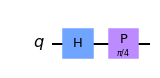

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(pi/4, 0)
qc.draw('mpl')

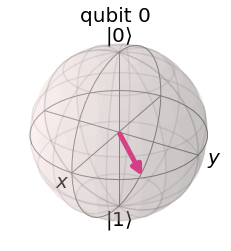

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state) 

<IPython.core.display.Latex object>

### S Gate

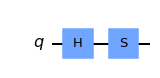

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)   # Apply S-gate to qubit 0
qc.draw('mpl')

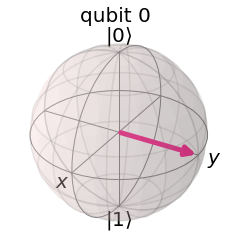

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state) 

<IPython.core.display.Latex object>

### T Gate

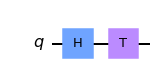

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)   # Apply T-gate to qubit 0
qc.draw('mpl')

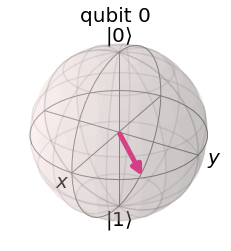

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state) 

<IPython.core.display.Latex object>

### U Gate

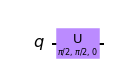

In [ ]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, pi/2, 0, 0)
qc.draw('mpl')

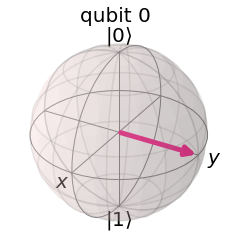

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
state = sim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(state) 

<IPython.core.display.Latex object>

### Unitary Matrices

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary) 

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary) 

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary) 

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary) 

<IPython.core.display.Latex object>

In [ ]:
import cirq

print("X Unitary Matrix")
print(cirq.unitary(cirq.X))
print("")
print("Y Unitary Matrix")
print(cirq.unitary(cirq.Y))
print("")
print("Z Unitary Matrix")
print(cirq.unitary(cirq.Z))
print("")
print("H Unitary Matrix")
print(cirq.unitary(cirq.H))


X Unitary Matrix
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Y Unitary Matrix
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

Z Unitary Matrix
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

H Unitary Matrix
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


## Topic 3 Multiple Qubits and Entanglement


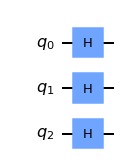

In [ ]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

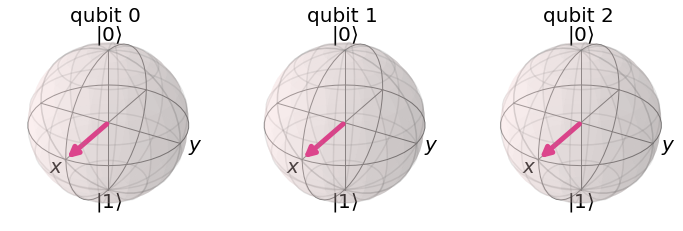

In [ ]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

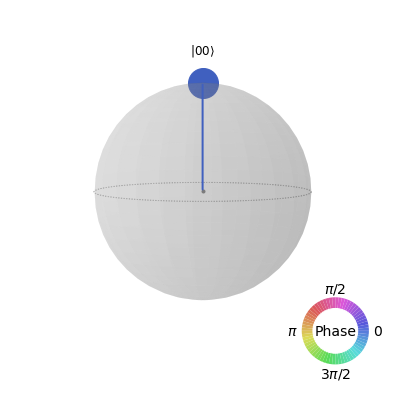

In [ ]:
plot_state_qsphere(final_state)

In [ ]:
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
array_to_latex(unitary)

<IPython.core.display.Latex object>

### Unitary Simulation of Tensor Product

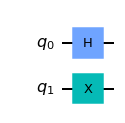

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

In [ ]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary) 

<IPython.core.display.Latex object>

### Activity: Superposition of Multiple Qubits

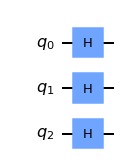

In [ ]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.draw('mpl')

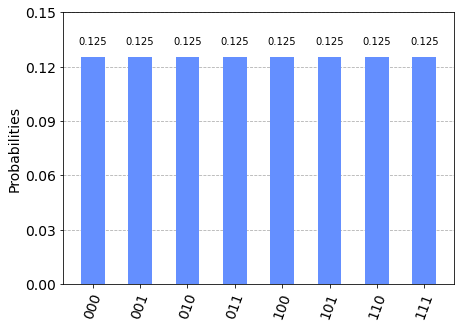

In [ ]:
# Let's get the result:
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

### The CNOT-Gate

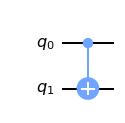

In [ ]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

In [ ]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary)

<IPython.core.display.Latex object>

### Entanglement

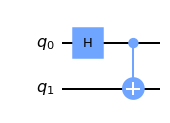

In [ ]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
array_to_latex(state) 

<IPython.core.display.Latex object>

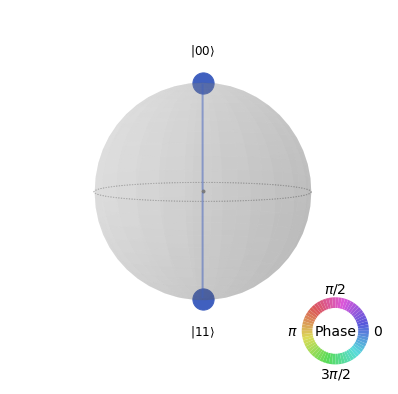

In [ ]:
state.draw('qsphere')
#plot_state_qsphere(state)

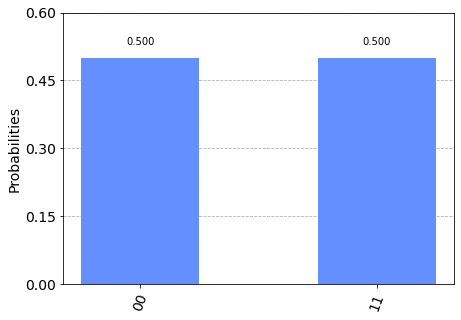

In [ ]:
# Let's get the result:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)

qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

#### Run on real quantum computer

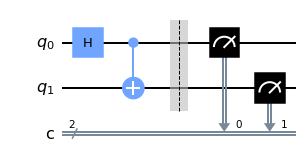

In [ ]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2), range(2))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(qc, range(2), front=True)

#drawing the circuit
qc.draw('mpl')

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits

from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend


<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

### Activity: Create a Entangled 3 Qubits

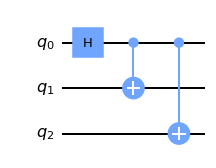

In [ ]:
qc = QuantumCircuit(3)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.cx(0,2)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')


<IPython.core.display.Latex object>

In [ ]:
array_to_latex(state) 

<IPython.core.display.Latex object>

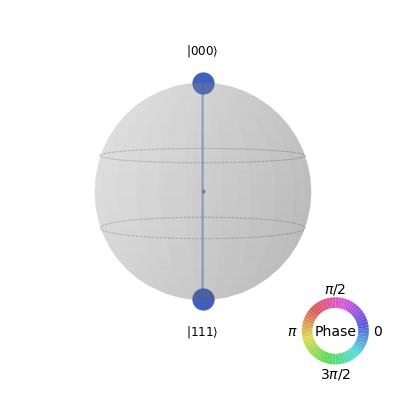

In [ ]:
plot_state_qsphere(state)

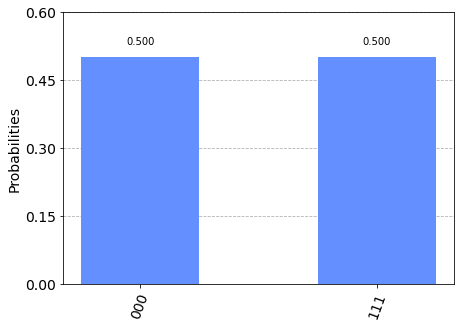

In [ ]:
# Let's get the result:
qc = QuantumCircuit(3)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.cx(0,2)

qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

### Activity: Bell State

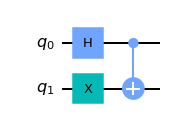

In [ ]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.x(1)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')


<IPython.core.display.Latex object>

In [ ]:
array_to_latex(state) 

<IPython.core.display.Latex object>

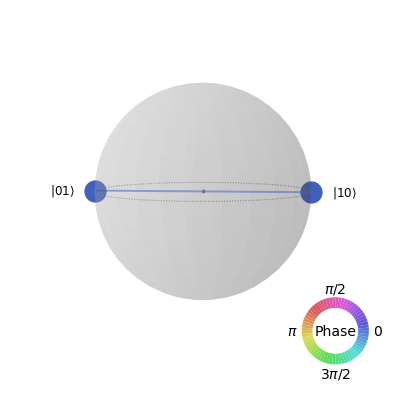

In [ ]:
plot_state_qsphere(state)

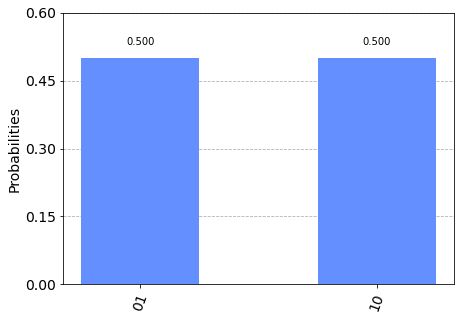

In [ ]:
# Let's get the result:
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

In [ ]:
# Using cirq instead of qiskit

import cirq

q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit()
circuit.append(cirq.H(q0))
circuit.append(cirq.X(q1))
circuit.append(cirq.CNOT(q0, q1))
circuit.append(cirq.measure(q0,q1))
print(circuit)


0: ───H───@───M───
          │   │
1: ───X───X───M───


#### Controlled Z Gate

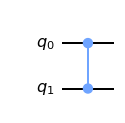

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cz(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')

<IPython.core.display.Latex object>

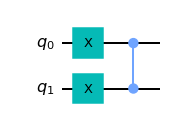

In [ ]:
qc = QuantumCircuit(2)
qc.x([0,1])
qc.cz(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
array_to_latex(state) 

<IPython.core.display.Latex object>

### Phase Kickback with CZ Gate

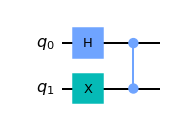

In [ ]:
qc = QuantumCircuit(2)
qc.h([0])
qc.x([1])
qc.cz(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')

<IPython.core.display.Latex object>

### Activity: Phase Kickback on CNot Gate

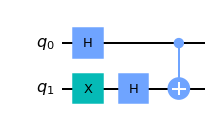

In [ ]:
qc = QuantumCircuit(2)
qc.h([0])
qc.x([1])
qc.h([1])
qc.cx(0,1)
qc.draw('mpl')

In [ ]:
# Let's see the result
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
state.draw('latex')

<IPython.core.display.Latex object>

## Topic 4 Quantum Algorithms


### Quantum Teleportation

In [ ]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target


In [ ]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [ ]:
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

In [ ]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

<IPython.core.display.Latex object>

ImportError: ignored

<Figure size 288x288 with 1 Axes>

In [ ]:
init_gate = Initialize(psi)
init_gate.label = "init"
inverse_init_gate = init_gate.gates_to_uncompute()

In [ ]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')

In [ ]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

### Superdense Coding

In [ ]:
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [ ]:
def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set([0,1]).issubset({0,1}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

In [ ]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [ ]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 1, message)
qc.barrier()
# Alice then sends her qubit to Bob.

# After receiving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw('mpl')

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

### Deutsch-Jozsa Algorithm

We now implement the Deutsch-Jozsa algorithm for the example of a three-bit function, with both constant and balanced oracles. First let's do our imports:

In [ ]:
# set the length of the n-bit input string. 
n = 3

#### Constant Oracle

In [ ]:
# Constant Oracle

const_oracle = QuantumCircuit(n+1)
const_oracle.barrier()

output = np.random.randint(2)
#output = 1
if output == 1:
    const_oracle.x(n)

const_oracle.barrier()

const_oracle.draw()

 #### Balanced Oracle

In [ ]:
balanced_oracle = QuantumCircuit(n+1)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

#### DJ Algorithm

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
#dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit = dj_circuit.compose(const_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit, shots=1024).result()
answer = results.get_counts()

plot_histogram(answer)

#### Run on Real Quantum Computer

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

### Bernstein-Vazirani Algorithm

In [ ]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
n = 3 # number of qubits used to represent s
s = '011'   # the hidden binary string

In [ ]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(n+1, n)

# put auxiliary in state |->
bv_circuit.x(n)
bv_circuit.h(n)


# Apply Hadamard gates before querying the oracle
for i in range(n):
    bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if s[q] == '0':
        bv_circuit.i(q)
    else:
        bv_circuit.cx(q, n)
        
# Apply barrier 
bv_circuit.barrier()

#Apply Hadamard gates after querying the oracle
for i in range(n):
    bv_circuit.h(i)

# Measurement
for i in range(n):
    bv_circuit.measure(i, i)

bv_circuit.draw()

In [ ]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(bv_circuit, shots=1024).result()
answer = results.get_counts()

plot_histogram(answer)

#### Run on Real Quantum Computer

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_bv_circuit = transpile(bv_circuit, backend, optimization_level=3)
job = backend.run(transpiled_bv_circuit)
job_monitor(job, interval=2)

In [ ]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

### Grover Algorithm

#### Non Quantum Method

In [ ]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [ ]:
def my_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [ ]:
for index, trial_number in enumerate(my_list):
    if my_oracle(trial_number) is True:
        print(f'Winner found at index {index}')

#### Grover Algorithm Simple Demo

In [ ]:
from qiskit import QuantumCircuit
from qiskit.algorithms import AmplificationProblem

# the state we desire to find is '11'
good_state = ['11']

# specify the oracle that marks the state '11' as a good solution
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# define Grover's algorithm
problem = AmplificationProblem(oracle, is_good_state=good_state)

# now we can have a look at the Grover operator that is used in running the algorithm
# (Algorithm circuits are wrapped in a gate to be appear in composition as a block
# so we have to decompose() the op to see it expanded into its component gates.)
problem.grover_operator.decompose().draw(output='mpl')

In [ ]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover

aer_simulator = Aer.get_backend('aer_simulator')
grover = Grover(quantum_instance=aer_simulator)
result = grover.amplify(problem)
print('Result type:', type(result))
print()
print('Success!' if result.oracle_evaluation else 'Failure!')
print('Top measurement:', result.top_measurement)

#### Grover Algorithm Method 1

In [ ]:
oracle = QuantumCircuit(2,name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw('mpl')

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

In [ ]:
reflection = QuantumCircuit(2,name="reflection")
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw('mpl')

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circ,backend,shots=1)
result = job.result()
result.get_counts()


#### Grover Algorithm Method 2

We now implement Grover's algorithm for the above case of 2 qubits for 
|w> = |11>

In [ ]:
n = 2
grover_circuit = QuantumCircuit(n)

In [ ]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

Apply the Oracle for |w> = |11>.This oracle is specific to 2 qubits:

In [ ]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')

In [ ]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw('mpl')

We now want to apply the diffuser (
). As with the circuit that initialises , we'll create a general diffuser (for any number of qubits) so we can use it later in other problems.

In [ ]:
# Diffusion (Reflection) operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.measure_all()
grover_circuit.draw('mpl')


#### Experiment with Simulators

In [ ]:
sv_sim = Aer.get_backend('statevector_simulator')
result = sv_sim.run(grover_circuit).result()
statevec = result.get_statevector()
np.round(statevec,2)

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
result = qasm_sim.run(grover_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

#### Experiment with Real Devices

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)


In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

### Quantum Fourier Transform

#### 3-qubits QFT Implementation

In [ ]:
qc = QuantumCircuit(3)
qc.h(2)

qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2


qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)

qc.swap(0,2)

qc.draw('mpl')

#### General QFT Implementation

In [ ]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)

    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [ ]:
# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

#### QFT Demo

In [ ]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

In [ ]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
qft(qc,3)
qc.draw('mpl')

In [ ]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

### Shor Algorithm

In [ ]:
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor

N = 15
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(N)
print(f"The list of factors of {N} as computed by the Shor's algorithm is {result.factors[0]}.")

The list of factors of 15 as computed by the Shor's algorithm is [3, 5].


In [ ]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [ ]:
# Specify variables
n_count = 5  # number of counting qubits
a = 4

In [ ]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

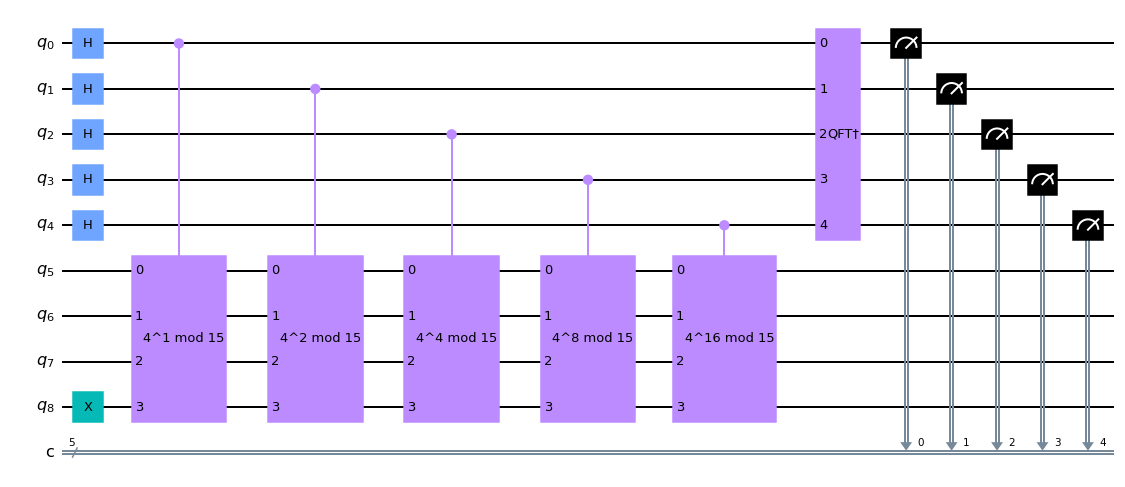

In [ ]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw('mpl',fold=-1)  # -1 means 'do not fold' 

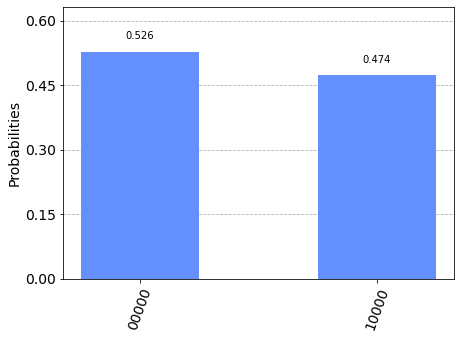

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

NameError: ignored

In [ ]:
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:


NameError: ignored

### Quantum Key Distribution (QKD)

In [ ]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0: # Prepare qubit in Z-basis
            if bits[i] == 0:
                pass 
            else:
                qc.x(0)
        else: # Prepare qubit in X-basis
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message

In [ ]:
def measure_message(message, bases):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0: # measuring in Z-basis
            message[q].measure(0,0)
        if bases[q] == 1: # measuring in X-basis
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        result = aer_sim.run(message[q], shots=1, memory=True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [ ]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            # If both used the same basis, add
            # this to the list of 'good' bits
            good_bits.append(bits[q])
    return good_bits

In [ ]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        # use np.mod to make sure the
        # bit we sample is always in 
        # the list range
        i = np.mod(i, len(bits))
        # pop(i) removes the element of the
        # list at index 'i'
        sample.append(bits.pop(i))
    return sample

In [ ]:
np.random.seed(seed=0)
n = 100

## Step 1
# Alice generates bits
alice_bits = randint(2, size=n)

## Step 2
# Create an array to tell us which qubits
# are encoded in which bases
alice_bases = randint(2, size=n)
message = encode_message(alice_bits, alice_bases)

## Step 3
# Decide which basis to measure in:
bob_bases = randint(2, size=n)
bob_results = measure_message(message, bob_bases)

## Step 4
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

## Step 5
sample_size = 15
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = "+ str(alice_sample))
bob_sample == alice_sample

In [ ]:
print(bob_key)
print(alice_key)
print("key length = %i" % len(alice_key))

In [ ]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
message[0].draw('mpl')

In [ ]:
print('bit = %i' % alice_bits[6])
print('basis = %i' % alice_bases[6])
message[6].draw('mpl')

In [ ]:
print(bob_results)

## Topic 5 Quantum Computing Applications

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

algorithm_globals.random_seed = 42

In [ ]:
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=1024)

### Classification wth QNN

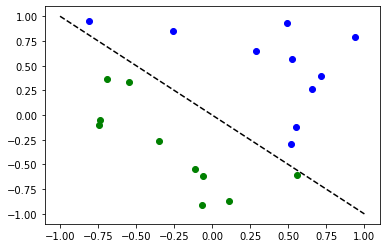

In [ ]:
num_inputs = 2
num_samples = 20
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [ ]:
# construct QNN
opflow_qnn = TwoLayerQNN(num_inputs, quantum_instance=quantum_instance)

In [ ]:
# QNN maps inputs to [-1, +1]
opflow_qnn.forward(X[0, :], algorithm_globals.random.random(opflow_qnn.num_weights))

array([[0.23242187]])

In [ ]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
# construct neural network classifier
opflow_classifier = NeuralNetworkClassifier(opflow_qnn, optimizer=COBYLA(), callback=callback_graph)

In [ ]:
# QNN maps inputs to [-1, +1]
opflow_qnn.forward(X[0, :], algorithm_globals.random.random(opflow_qnn.num_weights))

array([[0.0390625]])

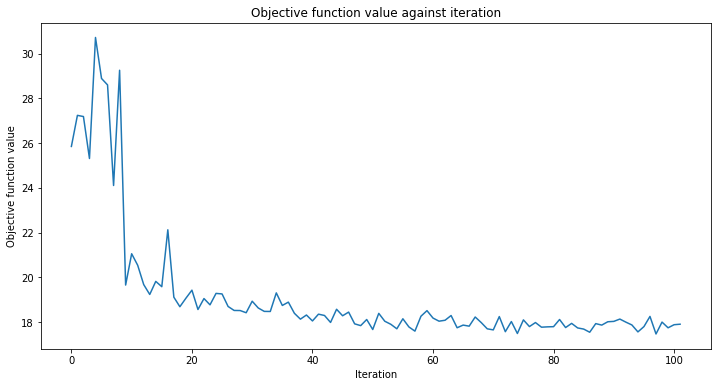

0.65

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
opflow_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
opflow_classifier.score(X, y)

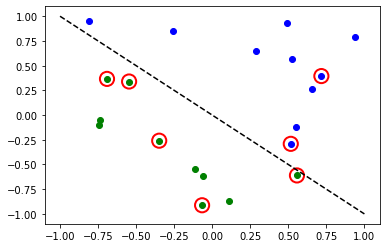

In [ ]:
# evaluate data points
y_predict = opflow_classifier.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [ ]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import wine
from qiskit_machine_learning.circuit.library import RawFeatureVector

seed = 1376
algorithm_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
training_size = 12
test_size = 4

# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
training_features, training_labels, test_features, test_labels = \
    wine(training_size=training_size, test_size=test_size, n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(feature_map=feature_map,
            ansatz=ansatz,
            optimizer=COBYLA(maxiter=100),
            quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                            shots=1024,
                                            seed_simulator=seed,
                                            seed_transpiler=seed)
            )
vqc.fit(training_features, training_labels)

score = vqc.score(test_features, test_labels)
print('Testing accuracy: {:0.2f}'.format(score))

### Regression with QNN

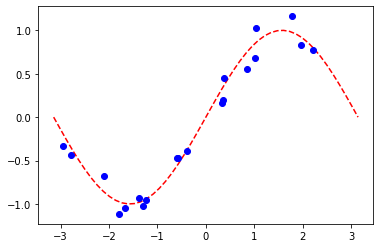

In [ ]:
num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

In [ ]:
# construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct QNN
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)

In [ ]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_opflow_qnn, loss="l2", optimizer=L_BFGS_B(), callback=callback_graph
)

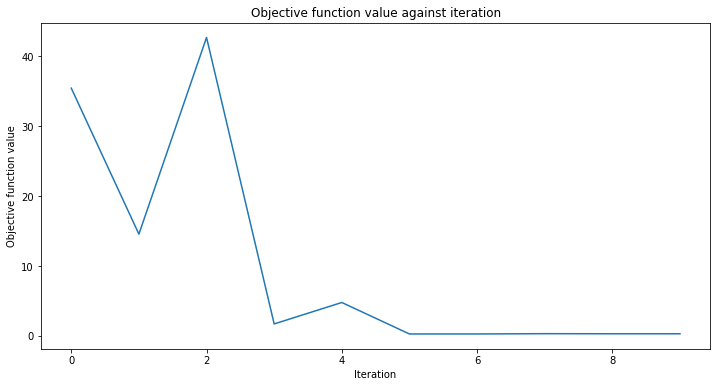

0.97291714841085

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

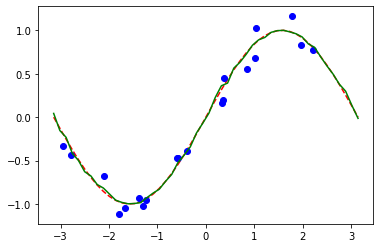

In [ ]:
# plot target function
plt.plot(X_, f(X_), "r--")

# plot data
plt.plot(X, y, "bo")

# plot fitted line
y_ = regressor.predict(X_)
plt.plot(X_, y_, "g-")
plt.show()

### Variational Quantum Eigensolver 

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

In [ ]:
import cirq

# define the length and width of the grid.
length = 3

# define qubits on the grid.
qubits = cirq.GridQubit.square(length)

print(qubits)

In [ ]:
circuit = cirq.Circuit()
circuit.append(cirq.H(q) for q in qubits if (q.row + q.col) % 2 == 0)
circuit.append(cirq.X(q) for q in qubits if (q.row + q.col) % 2 == 1)

print(circuit)

In [ ]:
def rot_x_layer(length, half_turns):
    """Yields X rotations by half_turns on a square grid of given length."""

    # Define the gate once and then re-use it for each Operation.
    rot = cirq.XPowGate(exponent=half_turns)

    # Create an X rotation Operation for each qubit in the grid.
    for i in range(length):
        for j in range(length):
            yield rot(cirq.GridQubit(i, j))

# Create the circuit using the rot_x_layer generator
circuit = cirq.Circuit()
circuit.append(rot_x_layer(2, 0.1))
print(circuit)

In [ ]:
import random
def rand2d(rows, cols):
    return [[random.choice([+1, -1]) for _ in range(cols)] for _ in range(rows)]

def random_instance(length):
    # transverse field terms
    h = rand2d(length, length)
    # links within a row
    jr = rand2d(length - 1, length)
    # links within a column
    jc = rand2d(length, length - 1)
    return (h, jr, jc)

h, jr, jc = random_instance(3)
print(f'transverse fields: {h}')
print(f'row j fields: {jr}')
print(f'column j fields: {jc}')

In [ ]:
def prepare_plus_layer(length):
    for i in range(length):
        for j in range(length):
            yield cirq.H(cirq.GridQubit(i, j))

In [ ]:
def rot_z_layer(h, half_turns):
    """Yields Z rotations by half_turns conditioned on the field h."""
    gate = cirq.ZPowGate(exponent=half_turns)
    for i, h_row in enumerate(h):
        for j, h_ij in enumerate(h_row):
            if h_ij == 1:
                yield gate(cirq.GridQubit(i, j))

In [ ]:
def rot_11_layer(jr, jc, half_turns):
    """Yields rotations about |11> conditioned on the jr and jc fields."""
    cz_gate = cirq.CZPowGate(exponent=half_turns)    
    for i, jr_row in enumerate(jr):
        for j, jr_ij in enumerate(jr_row):
            q = cirq.GridQubit(i, j)
            q_1 = cirq.GridQubit(i + 1, j)
            if jr_ij == -1:
                yield cirq.X(q)
                yield cirq.X(q_1)
            yield cz_gate(q, q_1)
            if jr_ij == -1:
                yield cirq.X(q)
                yield cirq.X(q_1)

    for i, jc_row in enumerate(jc):
        for j, jc_ij in enumerate(jc_row):
            q = cirq.GridQubit(i, j)
            q_1 = cirq.GridQubit(i, j + 1)
            if jc_ij == -1:
                yield cirq.X(q)
                yield cirq.X(q_1)
            yield cz_gate(q, q_1)
            if jc_ij == -1:
                yield cirq.X(q)
                yield cirq.X(q_1)

In [ ]:
def initial_step(length):
    yield prepare_plus_layer(length)

def one_step(h, jr, jc, x_half_turns, h_half_turns, j_half_turns):
    length = len(h)
    yield rot_z_layer(h, h_half_turns)
    yield rot_11_layer(jr, jc, j_half_turns)
    yield rot_x_layer(length, x_half_turns)

h, jr, jc = random_instance(3)

circuit = cirq.Circuit()  
circuit.append(initial_step(len(h)))
circuit.append(one_step(h, jr, jc, 0.1, 0.2, 0.3))
print(circuit)

In [ ]:
simulator = cirq.Simulator()
circuit = cirq.Circuit()
circuit.append(initial_step(len(h)))
circuit.append(one_step(h, jr, jc, 0.1, 0.2, 0.3))
circuit.append(cirq.measure(*qubits, key='x'))
results = simulator.run(circuit, repetitions=100)
print(results.histogram(key='x'))

In [ ]:
import numpy as np

def energy_func(length, h, jr, jc):
    def energy(measurements):
        # Reshape measurement into array that matches grid shape.
        meas_list_of_lists = [measurements[i * length:(i + 1) * length]
                              for i in range(length)]
        # Convert true/false to +1/-1.
        pm_meas = 1 - 2 * np.array(meas_list_of_lists).astype(np.int32)

        tot_energy = np.sum(pm_meas * h)
        for i, jr_row in enumerate(jr):
            for j, jr_ij in enumerate(jr_row):
                tot_energy += jr_ij * pm_meas[i, j] * pm_meas[i + 1, j]
        for i, jc_row in enumerate(jc):
            for j, jc_ij in enumerate(jc_row):
                tot_energy += jc_ij * pm_meas[i, j] * pm_meas[i, j + 1]
        return tot_energy
    return energy
print(results.histogram(key='x', fold_func=energy_func(3, h, jr, jc)))

In [ ]:
def obj_func(result):
    energy_hist = result.histogram(key='x', fold_func=energy_func(3, h, jr, jc))
    return np.sum([k * v for k,v in energy_hist.items()]) / result.repetitions
print(f'Value of the objective function {obj_func(results)}')

In [ ]:
import sympy
circuit = cirq.Circuit()
alpha = sympy.Symbol('alpha')
beta = sympy.Symbol('beta')
gamma = sympy.Symbol('gamma')
circuit.append(initial_step(len(h)))
circuit.append(one_step(h, jr, jc, alpha, beta, gamma))
circuit.append(cirq.measure(*qubits, key='x'))
print(circuit)

In [ ]:
resolver = cirq.ParamResolver({'alpha': 0.1, 'beta': 0.3, 'gamma': 0.7})
resolved_circuit = cirq.resolve_parameters(circuit, resolver)

In [ ]:
sweep = (cirq.Linspace(key='alpha', start=0.1, stop=0.9, length=5)
         * cirq.Linspace(key='beta', start=0.1, stop=0.9, length=5)
         * cirq.Linspace(key='gamma', start=0.1, stop=0.9, length=5))
results = simulator.run_sweep(circuit, params=sweep, repetitions=100)
for result in results:
    print(result.params.param_dict, obj_func(result))

In [ ]:
sweep_size = 10
sweep = (cirq.Linspace(key='alpha', start=0.0, stop=1.0, length=sweep_size)
         * cirq.Linspace(key='beta', start=0.0, stop=1.0, length=sweep_size)
         * cirq.Linspace(key='gamma', start=0.0, stop=1.0, length=sweep_size))
results = simulator.run_sweep(circuit, params=sweep, repetitions=100)

min = None
min_params = None
for result in results:
    value = obj_func(result)
    if min is None or value < min:
        min = value
        min_params = result.params
print(f'Minimum objective value is {min}.')

### Rabi's Oscillation

In [ ]:
import cirq
import cirq_google
working_device = cirq_google.Sycamore
print(working_device)

In [ ]:
my_qubit = cirq.GridQubit(5, 6)

In [ ]:
from cirq.contrib.svg import SVGCircuit

# Create a circuit with X, Ry(pi/2) and H.
my_circuit = cirq.Circuit(
    # Rotate the qubit pi/2 radians around the X axis.
    cirq.rx(3.141 / 2).on(my_qubit),
    # Measure the qubit.
    cirq.measure(my_qubit, key='out')
)
SVGCircuit(my_circuit)

In [ ]:
sim = cirq.Simulator()
samples = sim.sample(my_circuit, repetitions=10)
samples

In [ ]:
state_vector_before_measurement = sim.simulate(my_circuit[:-1])
sampled_state_vector_after_measurement = sim.simulate(my_circuit)

print(f'State before measurement:')
print(state_vector_before_measurement)
print(f'State after measurement:')
print(sampled_state_vector_after_measurement)

In [ ]:
noisy_sim = cirq.DensityMatrixSimulator(noise=cirq.depolarize(0.1))
noisy_post_measurement_state = noisy_sim.simulate(my_circuit)
noisy_pre_measurement_state = noisy_sim.simulate(my_circuit[:-1])

print('Noisy state after measurement:' + str(noisy_post_measurement_state))
print('Noisy state before measurement:' + str(noisy_pre_measurement_state))

In [ ]:
import sympy
theta = sympy.Symbol('theta')

parameterized_circuit = cirq.Circuit(
    cirq.rx(theta).on(my_qubit),
    cirq.measure(my_qubit, key='out')
)
SVGCircuit(parameterized_circuit)

In [ ]:
samples_at_theta_equals_2 = sim.sample(
    parameterized_circuit, 
    params={theta: 2}, 
    repetitions=10)
samples_at_theta_equals_2

In [ ]:
samples_at_multiple_theta = sim.sample(
    parameterized_circuit, 
    params=[{theta: 0.5}, {theta: 3.141}], 
    repetitions=10)
samples_at_multiple_theta

In [ ]:
samples_at_swept_theta = sim.sample(
    parameterized_circuit, 
    params=cirq.Linspace(theta, start=0, stop=3.14159, length=5), 
    repetitions=5)
samples_at_swept_theta

In [ ]:
import pandas

big_results = sim.sample(
    parameterized_circuit, 
    params=cirq.Linspace(theta, start=0, stop=3.14159, length=20), 
    repetitions=10_000)

# big_results is too big to look at. Plot cross tabulated data instead.
pandas.crosstab(big_results.theta, big_results.out).plot()

In [ ]:
import datetime

result = cirq.experiments.rabi_oscillations(
    sampler=noisy_sim,
    qubit=my_qubit,
    num_points=50,
    repetitions=10000)
result.plot()

## Topic 6 Quantum Error Correctoin

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')

### Syndrome Measurement

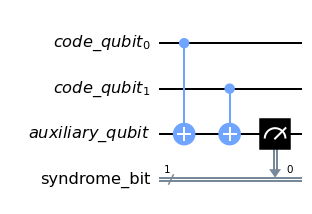

In [ ]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'auxiliary_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw('mpl')

In [ ]:
qc_init = QuantumCircuit(cq)
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


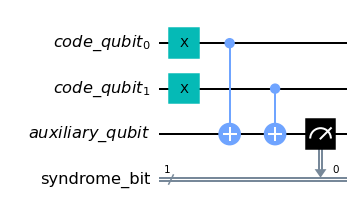

In [ ]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)
qc.compose(qc_init, front=True).draw('mpl')

In [ ]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


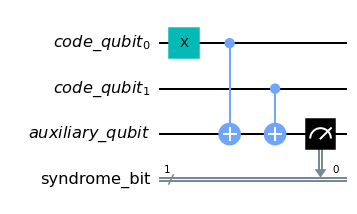

In [ ]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq[0])
qc.compose(qc_init, front=True).draw('mpl')

In [ ]:
qobj = assemble(qc.compose(qc_init, front=True))
counts = aer_sim.run(qobj).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


### Noise Model

In [ ]:
def get_noise(p_meas,p_gate):
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

In [ ]:
noise_model = get_noise(0.01,0.01)

In [ ]:
qc0 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc0.measure_all() # measure the qubits

# run the circuit with the noise model and extract the counts
qobj = assemble(qc0)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

In [ ]:
qc1 = QuantumCircuit(3) # initialize circuit with three qubits in the 0 state
qc1.x([0,1,2]) # flip each 0 to 1

qc1.measure_all() # measure the qubits

# run the circuit with th noise model and extract the counts
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()

plot_histogram(counts)

In [ ]:
noise_model = get_noise(0.5,0.0)
qobj = assemble(qc1)
counts = aer_sim.run(qobj, noise_model=noise_model).result().get_counts()
plot_histogram(counts)

### Quantum Repetition Code

In [ ]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding
aer_sim = Aer.get_backend('aer_simulator')

In [ ]:
n = 3
T = 1
code = RepetitionCode(n, T)

In [ ]:
code.circuit['0'].draw('mpl')

In [ ]:
code.circuit['1'].draw('mpl')

In [ ]:
def get_raw_results(code,noise_model=None):
    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        qobj = assemble(circuits[log])
        job = aer_sim.run(qobj, noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

### Activity: Quantum Repeating Code

#### n=2 and T=2

In [ ]:
n = 2
T = 2
code = RepetitionCode(n, T)

In [ ]:
code.circuit['0'].draw('mpl')

In [ ]:
code.circuit['1'].draw('mpl')

In [ ]:
raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

#### n=4 and T=1

In [ ]:
n = 4
T = 1
code = RepetitionCode(n, T)

In [ ]:
code.circuit['0'].draw('mpl')

In [ ]:
code.circuit['1'].draw('mpl')

In [ ]:
raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

#### n=5 and T=**4**

In [ ]:
n = 5
T = 5
code = RepetitionCode(n, T)

In [ ]:
code.circuit['0'].draw('mpl')

In [ ]:
code.circuit['1'].draw('mpl')

In [ ]:
raw_results = get_raw_results(code)
for log in raw_results:
    print('Logical', log, ':', raw_results[log], '\n')

In [ ]:
code = RepetitionCode(3,1)

raw_results = get_raw_results(code)

for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

In [ ]:
code = RepetitionCode(3,1)

noise_model = get_noise(0.05,0.05)

raw_results = get_raw_results(code,noise_model)
for log in raw_results:
    print('Logical', log,':', raw_results[log],'\n')

Our task when confronted with any of the possible outcomes we see here is to determine what the outcome should have been, if there was no noise. For an outcome of '000 00' or '111 00', the answer is obvious. These are the results we just saw for a logical 0 and logical 1, respectively, when no errors occur. The former is the most common outcome for the logical 0 even with noise, and the latter is the most common for the logical 1. We will therefore conclude that the outcome was indeed that for logical 0 whenever we encounter '000 00', and the same for logical 1 when we encounter '111 00'.